In [1]:
import json
import sys
import os
import pprint
import time
from datetime import datetime
import pandas as pd
import re
import collections
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# rs_basepath = ""
news_path = "news/RS_news"

submissions = pd.DataFrame()
submissions = pd.read_json(news_path, lines=True)

# submissions.head()


In [3]:
rc_news_path = "news/RC_news"

comments = pd.DataFrame()
comments = pd.read_json(rc_news_path, lines=True)
# comments.head()


In [4]:
news_urls_right = {"The_American_spectator":"spectator", "Breitbart":"breitbart",
                   "CBN":"cbn", "The_Daily_Caller": "dailycaller", "The_Daily_Mail": "dailymail",
                   "The_Daily_Wire" : "dailywire", "The_Fox_News": "foxnews", "The_Federalist": "thefederalist",
                   "National_Review":"nationalreview", "New_York_Post" : "nypost", "Newsmax": "newsmax",
                   "Reason": "reason", "Washington_Examiner":"washingtonexaminer",
                   "The_Washington_Times":"washingtontimes"
                   }
# "The_Wall_Street_Journal_Opinion_Base": "wsj/news/opinion",
# "The_Wall_Street_Journal_Opinion_Archive": "wsj/articles",

news_urls_center = {"Associated_Press":"apnews", "BBC":"bbc", "Bloomberg":"bloomberg",
                    "The_Christian_Science_Monitor":"csmonitor", "NPR_Online": "npr",
                    "Reuters" :"reuters", "The_Hill":"thehill", "USA_Today": "usatoday",
                    "Wall_Street_Journal_News": "wsj"}

news_urls_left = {"ABC_News": "abcnews", "The_Atlantic":"theatlantic", "The_Buzzfeed_News": "buzzfeednews",
                  "CBS_News": "cbsnews", "CNN_Online":"cnn", "The_Economist": "economist",
                  "The_Gaurdian": "theguardian", "NBC_News":"nbcnews", "The_New_York_Times":"nytimes",
                  "The_Los_Angeles_Times":"latimes", 
                  "Politico": "politico", "The_Washington_Post": "washingtonpost",
                  "Alternet": "alternet", "Democracy_Now": "democracynow", 
                  "The_Daily_Beast":"thedailybeast", "The_Huffington_Post":"huffpost",
                  "The Intercept":"theintercept", "Jacobin":"jacobinmag", "Mother Jones":"motherjones",
                  "MSNBC":"msnbc", "The_New_Yorker":"newyorker", "The_Nation":"thenation",
                  "Slate":"slate", "Vox":"vox"}
news_urls_social_media = ["youtube", "google", "twitter","yahoo", "youtu.be", "instagram", "reddit", "facebook", "spotify"]

all_urls = list(news_urls_right.values()) + list(news_urls_left.values()) + list(news_urls_center.values()) + news_urls_social_media

In [5]:
print(news_urls_left.values())
len(news_urls_left.values())

dict_values(['abcnews', 'theatlantic', 'buzzfeednews', 'cbsnews', 'cnn', 'economist', 'theguardian', 'nbcnews', 'nytimes', 'latimes', 'politico', 'washingtonpost', 'alternet', 'democracynow', 'thedailybeast', 'huffpost', 'theintercept', 'jacobinmag', 'motherjones', 'msnbc', 'newyorker', 'thenation', 'slate', 'vox'])


24

In [6]:
print(news_urls_center.values())
len(news_urls_center.values())

dict_values(['apnews', 'bbc', 'bloomberg', 'csmonitor', 'npr', 'reuters', 'thehill', 'usatoday', 'wsj'])


9

In [7]:
print(news_urls_right.values())
len(news_urls_right.values())

dict_values(['spectator', 'breitbart', 'cbn', 'dailycaller', 'dailymail', 'dailywire', 'foxnews', 'thefederalist', 'nationalreview', 'nypost', 'newsmax', 'reason', 'washingtonexaminer', 'washingtontimes'])


14

In [8]:
def get_leaning(domain_name):
    for s in news_urls_right.values():
        if domain_name.startswith(s) or "."+s in domain_name:
            return "right"
    for s in news_urls_left.values():
        if domain_name.startswith(s) or "."+s in domain_name:
            return "left"
    for s in news_urls_center.values():
        if domain_name.startswith(s) or "."+s in domain_name:
            return "center"
    for s in news_urls_social_media:
        if domain_name.startswith(s) or "."+s in domain_name:
            return "social"
    return "other" 

In [9]:
def get_base_domain(domain_name):
    # print(domain_name)
    for s in all_urls:
        if domain_name.startswith(s) or "."+s in domain_name:
            # print("Matched: ", s)
            return s
    return domain_name

In [10]:
submissions["leaning"] = submissions["domain"].apply(lambda x: get_leaning(x))
submissions["base_domain"] = submissions["domain"].apply(lambda x: get_base_domain(x))

submissions["full_date"] =  submissions["created_utc"].apply(lambda x: datetime.fromtimestamp(x))
submissions["date"] = submissions["full_date"].dt.date
# submissions.head()

posts_right = submissions.loc[submissions["leaning"] == "right"]
posts_left = submissions.loc[submissions["leaning"] == "left"]
posts_center = submissions.loc[submissions["leaning"] == "center"]
posts_social =  submissions.loc[submissions["leaning"] == "social"]
posts_other = submissions.loc[submissions["leaning"] == "other"]

all_included_posts = submissions.loc[submissions["leaning"] != "other"]

Posts with right leaning news outlet url:  2786
Posts with left leaning news outlet url:  10604
Posts with center leaning news outlet url:  7583
Posts from social media: 29307
Posts with other news outlet url:  148855
Total postas included in analysis:  50280
Total:  199135


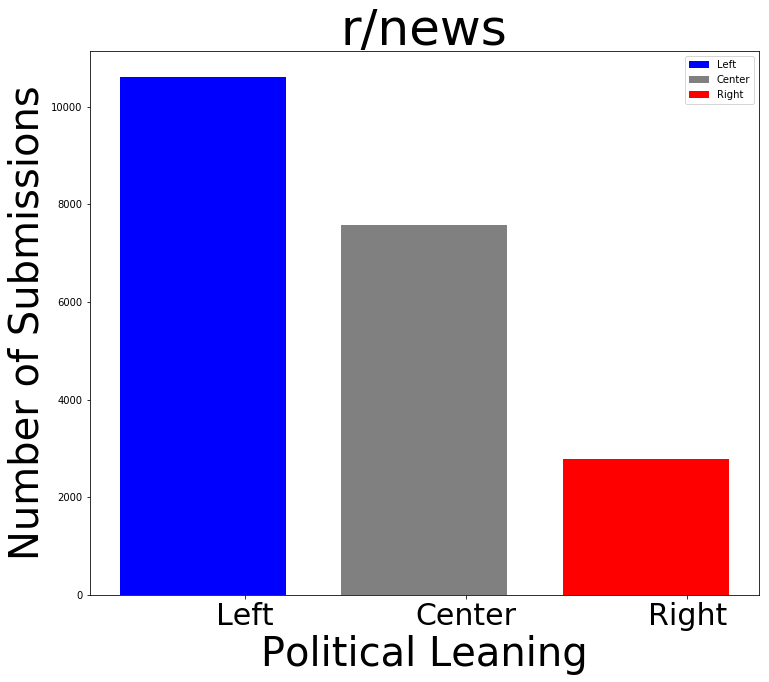

In [11]:
print("Posts with right leaning news outlet url: ", len(posts_right))
print("Posts with left leaning news outlet url: ", len(posts_left))
print("Posts with center leaning news outlet url: ", len(posts_center))
print("Posts from social media:", len(posts_social))
print("Posts with other news outlet url: ", len(posts_other))
print("Total postas included in analysis: ", len(all_included_posts))
print("Total: ", len(submissions))


plt.rcParams["figure.figsize"] = (12,10)
labels = ['Left', 'Center', 'Right']
num_subs = [len(posts_left), len(posts_center), len(posts_right)]

x = np.arange(len(labels))  # the label locations
width = 0.75  # the width of the bars

fig, ax = plt.subplots()
b1 = ax.bar(x - width/4, num_subs, width, color=['b', 'grey', 'r'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Submissions', fontsize=40)
ax.set_xlabel('Political Leaning',fontsize=40)
ax.set_title('r/news',fontsize=50)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=30)  

ax.legend(handles=b1, loc=1, labels=labels)
plt.savefig('news/n1.pdf', bbox_inches='tight', pad_inches=0)
plt.show()


# all_included_posts.plot.bar(x="leaning", y="counts")
# plt.xticks(np.arange(len(all_included_posts.counts)), all_included_posts.leaning)
# plt.xlabel("Leanings")
# plt.ylabel("Number of Posts")
# plt.title("Bar Plot for Number of Posts v/s Leaning of media outlet")
# plt.show()

In [12]:
domain_post_frequency =  all_included_posts.groupby("base_domain").count()["id"].reset_index(name='count').sort_values(['count'], ascending=False) 
print("Top 20 overall domains: \n\n")
domain_post_frequency.head(20)

Top 20 overall domains: 




,base_domain,count
55,youtube,22831
3,bbc,2350
9,cnn,2188
29,npr,1845
18,google,1830
46,twitter,1752
50,washingtonpost,1720
31,nytimes,1699
42,theguardian,1439
35,reuters,1423


In [13]:
right_domain_post_frequency =  posts_right.groupby("base_domain").count()["id"].reset_index(name='count').sort_values(['count'], ascending=False) 
print("Top 20 right leaning domains: \n\n")
right_domain_post_frequency.head(20)

Top 20 right leaning domains: 




,base_domain,count
5,foxnews,852
3,dailymail,677
0,breitbart,343
8,nypost,332
13,washingtontimes,192
2,dailycaller,141
12,washingtonexaminer,88
4,dailywire,59
9,reason,36
7,newsmax,24


In [14]:
left_domain_post_frequency =  posts_left.groupby("base_domain").count()["id"].reset_index(name='count').sort_values(['count'], ascending=False) 
print("Top 20 left leaning domains: \n\n")
left_domain_post_frequency.head(20)

Top 20 left leaning domains: 




,base_domain,count
4,cnn,2188
23,washingtonpost,1720
14,nytimes,1699
19,theguardian,1439
12,nbcnews,658
0,abcnews,599
3,cbsnews,514
9,latimes,470
15,politico,272
18,thedailybeast,226


In [15]:
center_domain_post_frequency =  posts_center.groupby("base_domain").count()["id"].reset_index(name='count').sort_values(['count'], ascending=False) 
print("Top 20 center leaning domains: \n\n")
center_domain_post_frequency.head(20)

Top 20 center leaning domains: 




,base_domain,count
1,bbc,2350
4,npr,1845
5,reuters,1423
7,usatoday,745
2,bloomberg,413
6,thehill,311
8,wsj,285
0,apnews,171
3,csmonitor,40


In [16]:
social_domain_post_frequency =  posts_social.groupby("base_domain").count()["id"].reset_index(name='count').sort_values(['count'], ascending=False) 
print("Top 20 social media domains: \n\n")
social_domain_post_frequency.head(20)

Top 20 social media domains: 




,base_domain,count
8,youtube,22831
1,google,1830
5,twitter,1752
7,youtu.be,1287
6,yahoo,918
0,facebook,501
3,reddit,156
4,spotify,25
2,instagram,7


In [17]:
overall_average_score =  all_included_posts.groupby("base_domain")['score'].mean().reset_index(name="average_score").sort_values(['average_score'], ascending=False) 
print("Top 20 overall average scores by domain:\n\n")
overall_average_score.head(20)

Top 20 overall average scores by domain:




,base_domain,average_score
2,apnews,360.304094
52,wsj,323.287719
40,thedailybeast,306.557522
22,latimes,268.193617
50,washingtonpost,247.277907
4,bloomberg,221.278450
53,yahoo,197.655773
42,theguardian,197.039611
8,cbsnews,186.424125
14,democracynow,130.030303


In [18]:
right_average_score =  posts_right.groupby("base_domain")['score'].mean().reset_index(name="average_score").sort_values(['average_score'], ascending=False) 
print("Top 20 average scores by domain for right leaning outlets:\n\n")
right_average_score.head(20)

Top 20 average scores by domain for right leaning outlets:




,base_domain,average_score
5,foxnews,89.627934
13,washingtontimes,30.942708
1,cbn,10.500000
10,spectator,5.625000
3,dailymail,3.193501
6,nationalreview,2.750000
9,reason,1.250000
8,nypost,1.072289
2,dailycaller,1.021277
4,dailywire,1.016949


In [19]:
left_average_score =  posts_left.groupby("base_domain")['score'].mean().reset_index(name="average_score").sort_values(['average_score'], ascending=False) 
print("Top 20 average scores by domain for left leaning outlets:\n\n")
left_average_score.head(20)

Top 20 average scores by domain for left leaning outlets:




,base_domain,average_score
18,thedailybeast,306.557522
9,latimes,268.193617
23,washingtonpost,247.277907
19,theguardian,197.039611
3,cbsnews,186.424125
5,democracynow,130.030303
12,nbcnews,128.662614
0,abcnews,121.141903
4,cnn,81.692870
14,nytimes,64.182460


In [20]:
center_average_score =  posts_center.groupby("base_domain")['score'].mean().reset_index(name="average_score").sort_values(['average_score'], ascending=False) 
print("Top 20 average scores by domain for center leaning outlets:\n\n")
center_average_score.head(20)

Top 20 average scores by domain for center leaning outlets:




,base_domain,average_score
0,apnews,360.304094
8,wsj,323.287719
2,bloomberg,221.278450
1,bbc,108.606383
7,usatoday,87.428188
5,reuters,84.851722
3,csmonitor,38.175000
4,npr,20.919241
6,thehill,1.016077


In [21]:
social_average_score =  posts_social.groupby("base_domain")['score'].mean().reset_index(name="average_score").sort_values(['average_score'], ascending=False) 
print("Top 20 average scores by domain for social media:\n\n")
social_average_score.head(20)

Top 20 average scores by domain for social media:




,base_domain,average_score
6,yahoo,197.655773
3,reddit,28.384615
1,google,1.226776
0,facebook,1.017964
5,twitter,1.008562
8,youtube,1.001051
7,youtu.be,1.000777
2,instagram,1.000000
4,spotify,0.960000


In [22]:
average_right_posts_score = posts_right["score"].mean()
average_left_posts_score = posts_left["score"].mean()
average_center_posts_score = posts_center["score"].mean()
average_social_posts_score = posts_social["score"].mean()

Average score of comments for submissions

----------------------------------------------------


Average score of posts from right leaning outlets:  30.73905240488155
Average score of posts from left leaning outlets:  137.34185213127122
Average score of posts from center leaning outlets:  95.83001450613214
Average score of posts from social media:  7.321527280171972


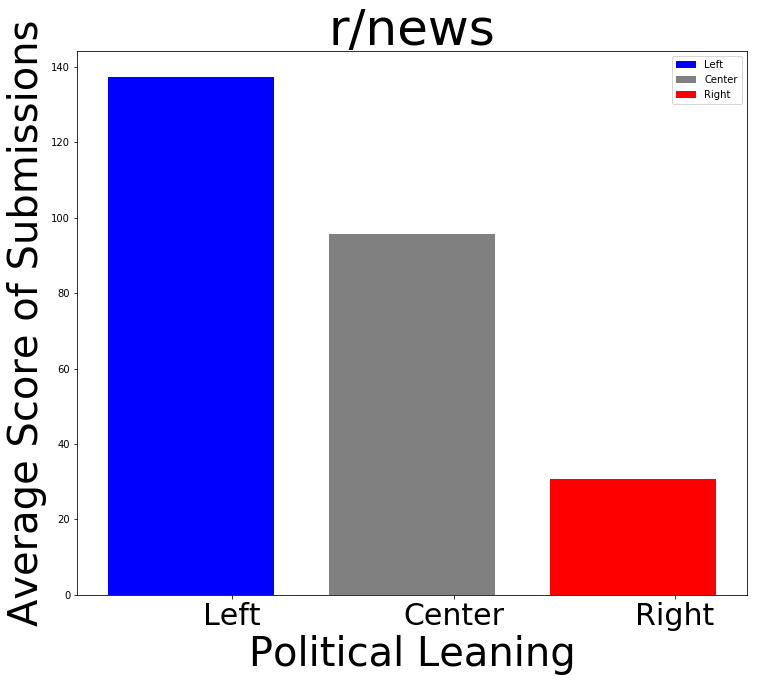

In [23]:
print("Average score of comments for submissions\n")
print("----------------------------------------------------\n\n")

print("Average score of posts from right leaning outlets: ", average_right_posts_score)
print("Average score of posts from left leaning outlets: ", average_left_posts_score)
print("Average score of posts from center leaning outlets: ", average_center_posts_score)
print("Average score of posts from social media: ", average_social_posts_score)


plt.rcParams["figure.figsize"] = (12,10)
labels = ['Left', 'Center', 'Right']
num_subs = [average_left_posts_score, average_center_posts_score, average_right_posts_score]

x = np.arange(len(labels))  # the label locations
width = 0.75  # the width of the bars

fig, ax = plt.subplots()
b1 = ax.bar(x - width/4, num_subs, width, color=['b', 'grey', 'r'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Score of Submissions', fontsize=40)
ax.set_xlabel('Political Leaning',fontsize=40)
ax.set_title('r/news',fontsize=50)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=30)  
ax.legend(handles=b1, loc=1, labels=labels)
plt.savefig('news/b2.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

In [24]:
comments["p_link_id"] = comments["link_id"].apply(lambda x: x.split("_")[1])

In [25]:
comments_right = comments.loc[comments['p_link_id'].isin(posts_right["id"])]
comments_right["leaning"] = "right"

comments_left = comments.loc[comments['p_link_id'].isin(posts_left["id"])]
comments_left["leaning"] = "left"

comments_center = comments.loc[comments['p_link_id'].isin(posts_center["id"])]
comments_center["leaning"] = "center"

comments_social = comments.loc[comments['p_link_id'].isin(posts_social["id"])]
comments_social["leaning"] = "social"

C:\Users\mansi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mansi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\mansi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

Average number of comments for submissions

----------------------------------------------------


Average number of comments per post from right leaning outlets:  16.86934673366834
Average number of comments per post from left leaning outlets:  38.6974726518295
Average number of comments per post from center leaning outlets:  25.778715547936173
Average number of comments per post from social media:  1.9833145664858225


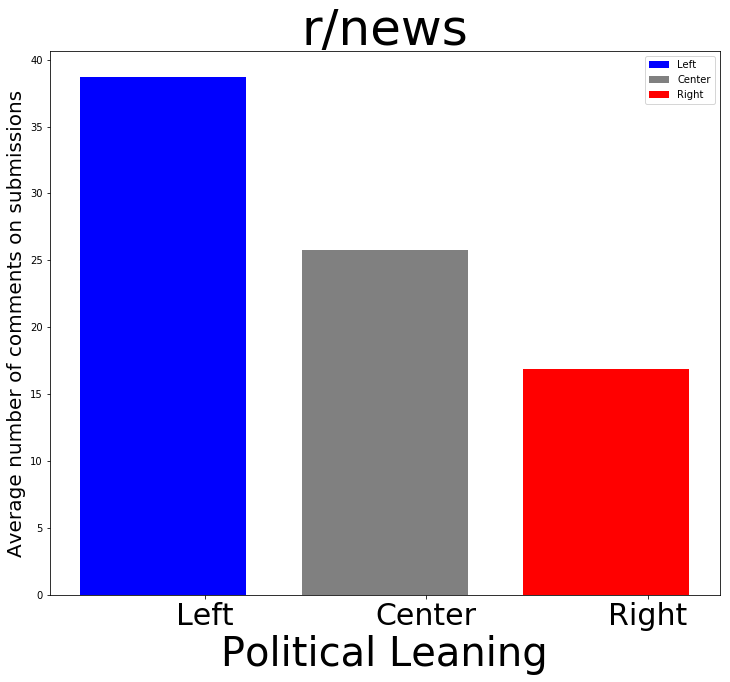

In [26]:
print("Average number of comments for submissions\n")
print("----------------------------------------------------\n\n")

print("Average number of comments per post from right leaning outlets: ", str(len(comments_right)/len(posts_right)))
print("Average number of comments per post from left leaning outlets: ", str(len(comments_left)/len(posts_left)))
print("Average number of comments per post from center leaning outlets: ", str(len(comments_center)/len(posts_center)))
print("Average number of comments per post from social media: ", str(len(comments_social)/len(posts_social)))



plt.rcParams["figure.figsize"] = (12,10)
labels = ['Left', 'Center', 'Right']
num_subs = [len(comments_left)/len(posts_left), len(comments_center)/len(posts_center), len(comments_right)/len(posts_right)]

x = np.arange(len(labels))  # the label locations
width = 0.75  # the width of the bars

fig, ax = plt.subplots()
b1 = ax.bar(x - width/4, num_subs, width, color=['b', 'grey', 'r'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average number of comments on submissions', fontsize=20)
ax.set_xlabel('Political Leaning',fontsize=40)
ax.set_title('r/news',fontsize=50)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=30)  
ax.legend(handles=b1, loc=1, labels=labels)
plt.savefig('news/n3.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

In [27]:
average_right_comments_score = comments_right["score"].mean()
average_left_comments_score = comments_left["score"].mean()
average_center_comments_score = comments_center["score"].mean()
average_social_comments_score = comments_social["score"].mean()

Average score of comments for submissions

----------------------------------------------------


Average score of comments on posts from right leaning outlets:  9.96025362781395
Average score of comments on posts from left leaning outlets:  9.154200824665894
Average score of comments on posts from center leaning outlets:  9.89926335174954
Average score of comments on posts from social media:  9.133075268817205


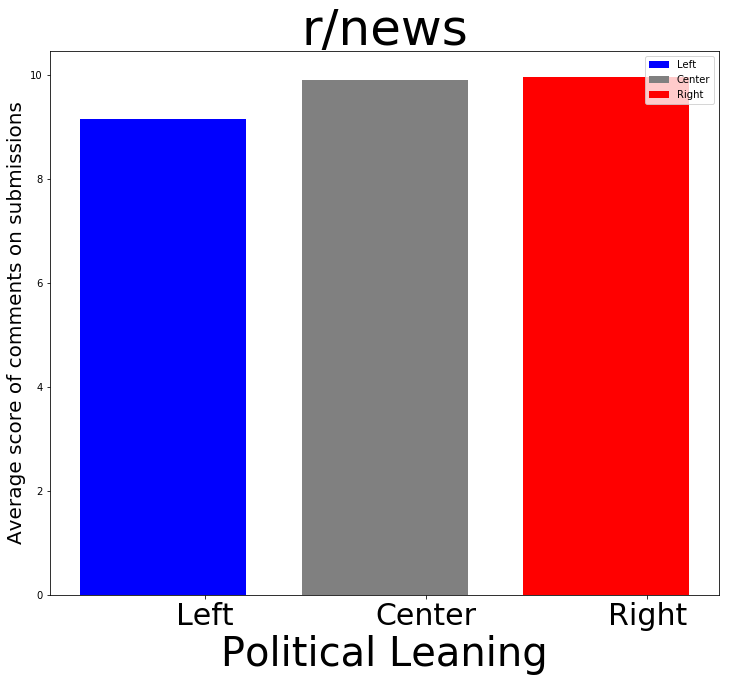

In [28]:
print("Average score of comments for submissions\n")
print("----------------------------------------------------\n\n")

print("Average score of comments on posts from right leaning outlets: ", average_right_comments_score)
print("Average score of comments on posts from left leaning outlets: ", average_left_comments_score)
print("Average score of comments on posts from center leaning outlets: ", average_center_comments_score)
print("Average score of comments on posts from social media: ", average_social_comments_score)

plt.rcParams["figure.figsize"] = (12,10)
labels = ['Left', 'Center', 'Right']
num_subs = [average_left_comments_score, average_center_comments_score, average_right_comments_score]

x = np.arange(len(labels))  # the label locations
width = 0.75  # the width of the bars

fig, ax = plt.subplots()
b1 = ax.bar(x - width/4, num_subs, width, color=['b', 'grey', 'r'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average score of comments on submissions', fontsize=20)
ax.set_xlabel('Political Leaning',fontsize=40)
ax.set_title('r/news',fontsize=50)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=30)  

ax.legend(handles=b1, loc=1, labels=labels)
plt.savefig('news/n4.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

In [29]:
posts_right_by_date = posts_right.groupby("date").count()["id"].reset_index(name="counts")
posts_left_by_date = posts_left.groupby("date").count()["id"].reset_index(name="counts")
posts_center_by_date = posts_center.groupby("date").count()["id"].reset_index(name="counts")
posts_social_by_date = posts_social.groupby("date").count()["id"].reset_index(name="count")

C:\Users\mansi\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


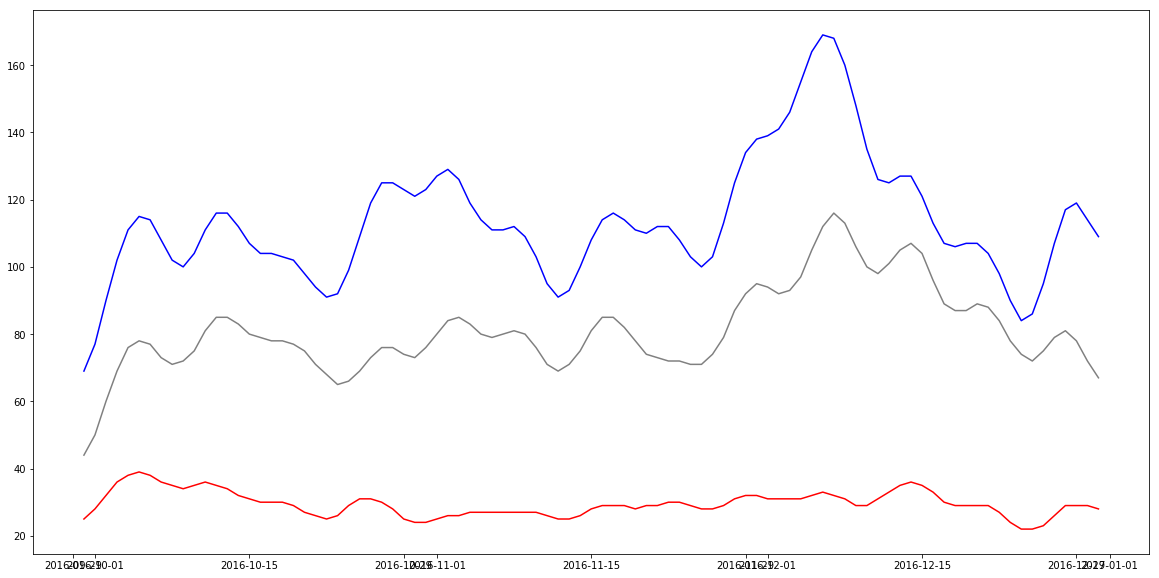

In [30]:
# posts_right_by_date.plot.line(x="date", y ="counts", subplots=True)

import matplotlib.dates as mdates
from scipy.ndimage.filters import gaussian_filter1d

plt.rcParams["figure.figsize"] = (20,10)
fig = plt.figure()

# plt.xlim(0,18000)
# plt.ylim(0,30)

labels= []

# months = mdates.MonthLocator(range(10, 13), bymonthday=1, interval=15)
# monthsFmt = mdates.DateFormatter("%d-%m-'%y")
# ax.xaxis.set_major_locator(months) #adding this makes the month ints disapper
# ax.xaxis.set_major_formatter(monthsFmt)
# handles, labels = ax.get_legend_handles_labels() #legend is nowhere on the plot
# ax.legend(handles, labels)

ax.set_ylabel('Average score of comments on submissions', fontsize=20)
ax.set_xlabel('Political Leaning',fontsize=40)
ax.set_title('r/politics',fontsize=50)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.legend(['left', 'center', 'right'], loc="best")

plt.plot(posts_left_by_date['date'], gaussian_filter1d(posts_left_by_date['counts'], sigma=2), color='b')
plt.plot(posts_center_by_date['date'], gaussian_filter1d(posts_center_by_date['counts'], sigma=2), color='grey')
plt.plot(posts_right_by_date['date'], gaussian_filter1d(posts_right_by_date['counts'], sigma=2), color='r')

plt.show()

In [31]:
submissions[["date", "id", "leaning"]].groupby(["date", "leaning"]).count()["id"].reset_index(name="counts").to_csv("subs_n.csv", index=False)

In [32]:
average_right_controversiality_score = comments_right["controversiality"].mean()
average_left_controversiality_score = comments_left["controversiality"].mean()
average_center_controversiality_score = comments_center["controversiality"].mean()
average_social_controversiality_score = comments_social["controversiality"].mean()

In [33]:
print("Average controversiality score of comments for submissions\n")
print("----------------------------------------------------\n\n")

print("Average controversiality score of comments on posts from right leaning outlets: ", average_right_controversiality_score)
print("Average controversiality score of comments on posts from left leaning outlets: ", average_left_controversiality_score)
print("Average controversiality score of comments on posts from center leaning outlets: ", average_center_controversiality_score)
print("Average controversiality score of comments on posts from social media: ", average_social_controversiality_score)

Average controversiality score of comments for submissions

----------------------------------------------------


Average controversiality score of comments on posts from right leaning outlets:  0.06544959359972764
Average controversiality score of comments on posts from left leaning outlets:  0.07269439597609834
Average controversiality score of comments on posts from center leaning outlets:  0.07453959484346225
Average controversiality score of comments on posts from social media:  0.07275698924731183


In [34]:
## Occurence of left leaning entities in title
right_keywords = ["donald", "trump", "republican", "gop"]
left_keywords = ["hillary", "clinton", "democrat", "dnc"]

total_score_right = 0
total_score_left = 0

count_right_in_right = posts_right.loc[posts_right["title"].apply(lambda x: any(s in x for s in right_keywords))].count()["id"]
total_score_right += posts_right.loc[posts_right["title"].apply(lambda x: any(s in x for s in right_keywords))]["score"].sum()
count_left_in_right =  posts_right.loc[posts_right["title"].apply(lambda x: any(s in x for s in left_keywords))].count()["id"]
total_score_left += posts_right.loc[posts_right["title"].apply(lambda x: any(s in x for s in left_keywords))]["score"].sum()

count_right_in_left = posts_left.loc[posts_left["title"].apply(lambda x: any(s in x for s in right_keywords))].count()["id"]
total_score_right += posts_left.loc[posts_left["title"].apply(lambda x: any(s in x for s in right_keywords))]["score"].sum()
count_left_in_left =  posts_left.loc[posts_left["title"].apply(lambda x: any(s in x for s in left_keywords))].count()["id"]
total_score_left += posts_left.loc[posts_left["title"].apply(lambda x: any(s in x for s in left_keywords))]["score"].sum()

count_right_in_center = posts_center.loc[posts_center["title"].apply(lambda x: any(s in x for s in right_keywords))].count()["id"]
total_score_right += posts_center.loc[posts_center["title"].apply(lambda x: any(s in x for s in right_keywords))]["score"].sum()
count_left_in_center = posts_center.loc[posts_center["title"].apply(lambda x: any(s in x for s in left_keywords))].count()["id"]
total_score_left += posts_center.loc[posts_center["title"].apply(lambda x: any(s in x for s in left_keywords))]["score"].sum()

count_right_in_social = posts_social.loc[posts_social["title"].apply(lambda x: any(s in x for s in right_keywords))].count()["id"]
total_score_right += posts_social.loc[posts_social["title"].apply(lambda x: any(s in x for s in right_keywords))]["score"].sum()
count_left_in_social = posts_social.loc[posts_social["title"].apply(lambda x: any(s in x for s in left_keywords))].count()["id"]
total_score_left += posts_left.loc[posts_left["title"].apply(lambda x: any(s in x for s in left_keywords))]["score"].sum()

total_length = len(all_included_posts)
average_score_right = total_score_right / total_length
average_score_left = total_score_left / total_length

In [35]:
print("Right leaning words: ", right_keywords)
print("Number of mentions of right leaning words in right leaning posts: ", count_right_in_right)
print("Number of mentions of right leaning words in left leaning posts: ", count_right_in_left)
print("Number of mentions of right leaning words in center leaning posts: ", count_right_in_center)
print("Number of mentions of right leaning words in social media posts: ", count_right_in_social)
print("\n")
print("Average score of posts with right leaning words: ", average_score_right)




print("\n\n---------------------------------------------------------------------------------------------------\n\n")

print("Left leaning words: ", left_keywords)
print("Number of mentions of left leaning words in right leaning posts: ", count_left_in_right)
print("Number of mentions of left leaning words in left leaning posts: ", count_left_in_left)
print("Number of mentions of left leaning words in center leaning posts: ", count_left_in_center)
print("Number of mentions of left leaning words in social media posts: ", count_left_in_social)
print("\n")
print("Average score of posts with left leaning words: ", average_score_left)

Right leaning words:  ['donald', 'trump', 'republican', 'gop']
Number of mentions of right leaning words in right leaning posts:  4
Number of mentions of right leaning words in left leaning posts:  16
Number of mentions of right leaning words in center leaning posts:  3
Number of mentions of right leaning words in social media posts:  75


Average score of posts with right leaning words:  0.0029634049323786792


---------------------------------------------------------------------------------------------------


Left leaning words:  ['hillary', 'clinton', 'democrat', 'dnc']
Number of mentions of left leaning words in right leaning posts:  4
Number of mentions of left leaning words in left leaning posts:  3
Number of mentions of left leaning words in center leaning posts:  2
Number of mentions of left leaning words in social media posts:  17


Average score of posts with left leaning words:  0.0002983293556085919


In [36]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from math import sqrt

In [37]:
submissions.columns

Index(['archived', 'author', 'author_flair_css_class', 'author_flair_text',
       'contest_mode', 'created_utc', 'distinguished', 'domain', 'downs',
       'edited', 'gilded', 'hide_score', 'id', 'is_self',
       'link_flair_css_class', 'link_flair_text', 'locked', 'media',
       'media_embed', 'name', 'num_comments', 'over_18', 'permalink',
       'post_hint', 'preview', 'quarantine', 'retrieved_on', 'saved', 'score',
       'secure_media', 'secure_media_embed', 'selftext', 'spoiler', 'stickied',
       'subreddit', 'subreddit_id', 'thumbnail', 'title', 'ups', 'url',
       'leaning', 'base_domain', 'full_date', 'date'],
      dtype='object')

In [38]:
domain_post_frequency[domain_post_frequency["base_domain"]=="foxnews"]["count"]

domain_post_frequency_dict = domain_post_frequency.set_index('base_domain').T.to_dict()
domain_post_frequency_dict.get("youtube").get("count")

22831

In [39]:
def get_count(domain):
    if domain in domain_post_frequency_dict.keys():
        return domain_post_frequency_dict.get(domain).get("count")
    else:
        return 0
    

In [40]:
submissions["full_date"] =  submissions["created_utc"].apply(lambda x: datetime.fromtimestamp(x))
submissions["date"] = submissions["full_date"].dt.date
# submissions["time"] = submissions["full_date"].str.split(" ")[1]
# submissions["year"] =  pd.DatetimeIndex(submissions["date"]).year
# submissions["month"] =  pd.DatetimeIndex(submissions["date"]).month
# submissions["day"] =  pd.DatetimeIndex(submissions["date"]).day
# submissions["week"] =  pd.DatetimeIndex(submissions["date"]).week

submissions["hour"] =  pd.DatetimeIndex(submissions["full_date"]).hour
submissions["title"] =  submissions["title"].apply(lambda x: x.lower())

submissions["history"] = submissions["base_domain"].apply(lambda x: get_count(x))
# submissions["min"] =  pd.DatetimeIndex(submissions["time"]).minute

# submissions[["hour"]]

In [41]:
submissions.columns

Index(['archived', 'author', 'author_flair_css_class', 'author_flair_text',
       'contest_mode', 'created_utc', 'distinguished', 'domain', 'downs',
       'edited', 'gilded', 'hide_score', 'id', 'is_self',
       'link_flair_css_class', 'link_flair_text', 'locked', 'media',
       'media_embed', 'name', 'num_comments', 'over_18', 'permalink',
       'post_hint', 'preview', 'quarantine', 'retrieved_on', 'saved', 'score',
       'secure_media', 'secure_media_embed', 'selftext', 'spoiler', 'stickied',
       'subreddit', 'subreddit_id', 'thumbnail', 'title', 'ups', 'url',
       'leaning', 'base_domain', 'full_date', 'date', 'hour', 'history'],
      dtype='object')

In [42]:
submissions["history"].head()

0      413
1      272
2     1830
3    22831
4        0
Name: history, dtype: int64

In [43]:
embeddings = {}

with open('glove.6B.50d.txt',encoding="utf8") as f:
    lines = f.read().strip().split('\n')
    for line in lines:
        word = line.split()[0]
        vector = np.array(line.split()[1:], dtype=np.float)
        embeddings[word] = vector

In [44]:
def get_embeddings(title):
    pattern = re.compile('[\W_]+')
    s = "this is a sample sentence?"
    tokens = pattern.sub(' ', title).lower().split()
    title_embed = np.array([embeddings[word] for word in tokens if word in embeddings])
    avg_title_embed = np.mean(title_embed, axis=0)
#     print("Returning: ", avg_title_embed)
    return avg_title_embed

In [45]:
def get_time_of_day(hour):
    if hour >=0 and hour<=6:
        return "night"
    elif hour>6  and hour<=12:
        return "morning"
    elif hour>12 and hour<=18:
        return "noon"
    elif hour>18 and hour<=24:
        return "evening"

In [46]:
submissions["tod"] = submissions["hour"].apply(lambda x: get_time_of_day(x))

In [47]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [71]:
plt.rcParams["figure.figsize"] = (20,10)

xx = submissions[["num_comments", "title", "hour", "leaning", "score", "history", "tod"]]

leaning_dummies = pd.get_dummies(xx["leaning"], prefix="is")
xx= pd.concat([xx, leaning_dummies], axis=1)
xx.drop("leaning", axis=1, inplace=True)


tod_dummies = pd.get_dummies(xx["tod"], prefix="is")
xx= pd.concat([xx, tod_dummies], axis=1)
xx.drop("tod", axis=1, inplace=True)

# print(len(X))

# print(xx.corr(method="pearson"))
# plt.matshow(xx.corr(method="pearson"))
# plt.show()
print(xx.corr())

print("\n\n******************************************************************\n\n")
print(calculate_pvalues(xx))

corrs = xx.corr()
pvalues = calculate_pvalues(xx)

corrs.to_csv("corrs.csv",index=False)

pvalues.to_csv("pvalues.csv", index=False)


              num_comments      hour     score   history  is_center   is_left  \
num_comments      1.000000 -0.001176  0.727993 -0.016346   0.019609  0.041588   
hour             -0.001176  1.000000 -0.001809 -0.011065   0.009673  0.039441   
score             0.727993 -0.001809  1.000000 -0.014298   0.015287  0.030765   
history          -0.016346 -0.011065 -0.014298  1.000000  -0.033992 -0.048095   
is_center         0.019609  0.009673  0.015287 -0.033992   1.000000 -0.047187   
is_left           0.041588  0.039441  0.030765 -0.048095  -0.047187  1.000000   
is_other         -0.017706 -0.026730 -0.010267 -0.667153  -0.342343 -0.408063   
is_right          0.005417  0.013572 -0.000726 -0.037415  -0.023700 -0.028250   
is_social        -0.017034 -0.001944 -0.014927  0.879364  -0.082653 -0.098520   
is_evening       -0.013927  0.783361 -0.013224 -0.042295  -0.046876 -0.041154   
is_morning        0.012544 -0.092670  0.011487  0.075451   0.065764  0.070377   
is_night         -0.007270 -

In [81]:
xx = submissions[["num_comments", "title", "hour", "leaning", "score", "history", "tod"]]
xx.groupby("hour").count()

,num_comments,title,leaning,score,history,tod
hour,,,,,,
0,10638,10638,10638,10638,10638,10638
1,11603,11603,11603,11603,11603,11603
2,12496,12496,12496,12496,12496,12496
3,12261,12261,12261,12261,12261,12261
4,11159,11159,11159,11159,11159,11159
5,9353,9353,9353,9353,9353,9353
6,7709,7709,7709,7709,7709,7709
7,7738,7738,7738,7738,7738,7738
8,7990,7990,7990,7990,7990,7990


In [82]:
import scipy.stats as stats

times = ["morning", "noon", "evening", "night"]
leanings = ["left", "right", "center", "social", "other"]
hours = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

ff = submissions[["num_comments", "hour", "leaning", "score", "tod"]]

print("ANOVA results:\n\n")



print("Leaning and num_comments pvalues:\n")
print(stats.f_oneway(ff['num_comments'][ff['leaning'] == leanings[0]],
              ff['num_comments'][ff['leaning'] == leanings[1]],
              ff['num_comments'][ff['leaning'] == leanings[2]],
              ff['num_comments'][ff['leaning'] == leanings[3]],
              ff['num_comments'][ff['leaning'] == leanings[4]]))
print("********************************************************************\n\n")

print("Time of day and num_comments pvalues:")
print(stats.f_oneway(ff['num_comments'][ff['tod'] == times[0]],
              ff['num_comments'][ff['tod'] == times[1]],
              ff['num_comments'][ff['tod'] == times[2]],
              ff['num_comments'][ff['tod'] == times[3]]))

print("********************************************************************\n\n")

print("Hour of day and num_comments pvalues:")
print(stats.f_oneway(ff['num_comments'][ff['hour'] == hours[0]],
              ff['num_comments'][ff['hour'] == hours[1]],
              ff['num_comments'][ff['hour'] == hours[2]],
              ff['num_comments'][ff['hour'] == hours[3]],
              ff['num_comments'][ff['hour'] == hours[4]],
              ff['num_comments'][ff['hour'] == hours[5]],
              ff['num_comments'][ff['hour'] == hours[6]],
              ff['num_comments'][ff['hour'] == hours[7]],
              ff['num_comments'][ff['hour'] == hours[8]],
              ff['num_comments'][ff['hour'] == hours[9]],
              ff['num_comments'][ff['hour'] == hours[10]],
              ff['num_comments'][ff['hour'] == hours[11]],
              ff['num_comments'][ff['hour'] == hours[12]],
              ff['num_comments'][ff['hour'] == hours[13]],
              ff['num_comments'][ff['hour'] == hours[14]],
              ff['num_comments'][ff['hour'] == hours[15]],
              ff['num_comments'][ff['hour'] == hours[16]],
              ff['num_comments'][ff['hour'] == hours[17]],
              ff['num_comments'][ff['hour'] == hours[18]],
              ff['num_comments'][ff['hour'] == hours[19]],
              ff['num_comments'][ff['hour'] == hours[20]],
              ff['num_comments'][ff['hour'] == hours[21]],
              ff['num_comments'][ff['hour'] == hours[22]],
              ff['num_comments'][ff['hour'] == hours[23]]))

ANOVA results:


Leaning and num_comments pvalues:

F_onewayResult(statistic=117.90949392189837, pvalue=1.201162044417233e-100)
********************************************************************


Time of day and num_comments pvalues:
F_onewayResult(statistic=27.3400353373118, pvalue=1.140882726940286e-17)
********************************************************************


Hour of day and num_comments pvalues:
F_onewayResult(statistic=9.289110416522536, pvalue=7.885340999362367e-33)


In [49]:
xx.dtypes

num_comments     int64
title           object
hour             int64
score            int64
history          int64
is_center        uint8
is_left          uint8
is_other         uint8
is_right         uint8
is_social        uint8
is_evening       uint8
is_morning       uint8
is_night         uint8
is_noon          uint8
dtype: object

In [50]:
# xx.drop("title", axis=1, inplace=True)
from scipy import stats
chi2_stat, p_val, dof, ex = stats.chi2_contingency(xx)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

TypeError: '<' not supported between instances of 'str' and 'int'

In [52]:
def corrcoef_loop(matrix):
    rows, cols = matrix.shape[0], matrix.shape[1]
    r = np.ones(shape=(rows, rows))
    p = np.ones(shape=(rows, rows))
    for i in range(rows):
        for j in range(i+1, rows):
            r_, p_ = pearsonr(matrix[i], matrix[j])
            r[i, j] = r[j, i] = r_
            p[i, j] = p[j, i] = p_
    return r, p

In [53]:
r,p = corrcoef_loop(xx)
# print(r)
# print("*******************************************************")
print(p)

MemoryError: Unable to allocate array with shape (199135, 199135) and data type float64

In [66]:
import pandas
from scipy.stats import mstats



dd = submissions[["num_comments", "title", "hour", "leaning", "score", "history", "tod"]]
dd = dd.dropna()
# print(dd.head())
Col_1 = list(dd['num_comments'])
Col_2 = list(dd['leaning'])
Col_3 = list(dd['hour'])
Col_4 = list(dd['score'])
Col_5 = list(dd['history'])
Col_6 = list(dd['tod'])

print("Kruskal Wallis H-test test:")

H, pval = mstats.kruskalwallis(Col_1, Col_2, Col_3, Col_4, Col_5, Col_6)

print("H-statistic:", H)
print("P-Value:", pval)

if pval < 0.05:
    print("Reject NULL hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Accept NULL hypothesis - No significant difference between groups.")

Kruskal Wallis H-test test:


ValueError: could not convert string to float: 'center'

In [67]:
import scipy.stats as stats

Col_1 = list(dd['num_comments'])
Col_2 = list(dd['leaning'])
Col_3 = list(dd['hour'])
Col_4 = list(dd['score'])
Col_5 = list(dd['history'])
Col_6 = list(dd['tod'])


stats.f_oneway(Col_1, Col_2, Col_3, Col_4, Col_5, Col_6)

ValueError: could not convert string to float: 'center'

In [ ]:
n=6
r=xx.corr()
t=r*np.sqrt((n-2)/(1-r*r))

import scipy.stats as ss
ss.t.cdf(t, n-2)

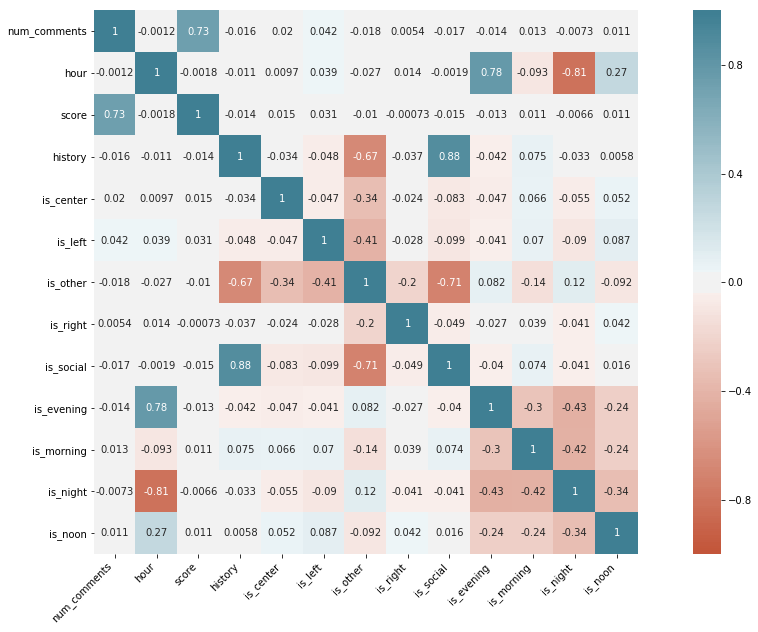

In [69]:
import seaborn as sns
corr = xx.corr(method='pearson')
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

[[1.         0.49911767 0.94954045 0.48774144 0.5147052  0.53117299
  0.48672167 0.50406281 0.48722572 0.4895552  0.50940736 0.49454754
  0.50853831]
 [0.49911767 1.         0.49864324 0.49170165 0.50725441 0.52956534
  0.47995744 0.51017867 0.49854228 0.96734258 0.43069666 0.02493184
  0.70045835]
 [0.94954045 0.49864324 1.         0.48927728 0.51146463 0.52306671
  0.49230035 0.49945538 0.48880594 0.49008275 0.50861465 0.49506606
  0.50814915]
 [0.48774144 0.49170165 0.48927728 1.         0.47451573 0.46395639
  0.07387151 0.47195201 0.98952415 0.46829743 0.55648091 0.47549669
  0.50433208]
 [0.5147052  0.50725441 0.51146463 0.47451573 1.         0.46463616
  0.25327339 0.48222812 0.43815147 0.46486872 0.54925163 0.45858712
  0.53906482]
 [0.53117299 0.52956534 0.52306671 0.46395639 0.46463616 1.
  0.21093975 0.47881808 0.42634905 0.46915197 0.55269557 0.43235714
  0.56494371]
 [0.48672167 0.47995744 0.49230035 0.07387151 0.25327339 0.21093975
  1.         0.34843551 0.05521654 0.561

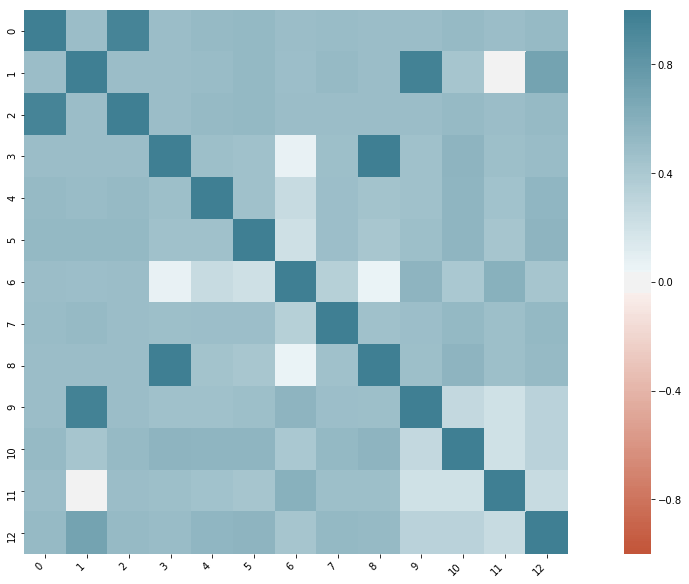

In [70]:
n=6
r=xx.corr()
t=r*np.sqrt((n-2)/(1-r*r))

import scipy.stats as ss
pvalues = ss.t.cdf(t, n-2)
print(pvalues)

corr = xx.corr(method='pearson')
ax = sns.heatmap(
    pvalues, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
random_seed = 2

In [ ]:
X = submissions[["title", "hour", "leaning", "score"]]
# print(len(X))
hours_dummies = pd.get_dummies(X["hour"], prefix="hour")
X = pd.concat([X, hours_dummies], axis=1)
X.drop("hour", axis=1, inplace=True)
# print(len(X))

leaning_dummies = pd.get_dummies(X["leaning"], prefix="is")
X = pd.concat([X, leaning_dummies], axis=1)
X.drop("leaning", axis=1, inplace=True)
# print(len(X))

# print(X.corr())

X['vector'] = X['title'].apply(get_embeddings)
# X = pd.concat([X, ])
X.drop("title", axis=1, inplace=True)
# print(len(X))
s = X["vector"].apply(pd.Series)
X = pd.concat([X,s], axis=1)
X.drop("vector", axis=1, inplace=True)
# print(len(X))  

X.dropna(axis=0, inplace=True)
y = X["score"]
X.drop("score", axis=1, inplace=True)
# print(len(X))

# print("Columns: ", X.columns)
# print(X.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = random_seed)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

score_rmse = sqrt(mean_squared_error(y_test, y_pred))
score_r2 = r2_score(y_test, y_pred)
print("Root Mean squared error: %.2f"
      % score_rmse)
print('Variance(R2) score: %.2f' % score_r2)   

In [ ]:
X = submissions[["title", "hour",  "score"]]
hours_dummies = pd.get_dummies(X["hour"], prefix="hour")
X = pd.concat([X, hours_dummies], axis=1)
X.drop("hour", axis=1, inplace=True)

# leaning_dummies = pd.get_dummies(X["leaning"], prefix="is")
# X = pd.concat([X, leaning_dummies], axis=1)
# X = X.drop("leaning", axis=1)

X['vector'] = X['title'].apply(get_embeddings)
# X = pd.concat([X, ])
X.drop("title", axis=1, inplace=True)
s = X["vector"].apply(pd.Series)
X = pd.concat([X,s], axis=1)
X.drop("vector", axis=1, inplace=True)

X.dropna(axis=0, inplace=True)
y = X["score"]
X.drop("score", axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = random_seed)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)


score_no_lean_mse = sqrt(mean_squared_error(y_test, y_pred))
score_no_lean_r2 = r2_score(y_test, y_pred)

print("Root Mean squared error: %.2f"
      % score_no_lean_mse)

print('Variance(R2) score: %.2f' % score_no_lean_r2)

In [ ]:
X = submissions[["num_comments", "title", "hour",  "score"]]
hours_dummies = pd.get_dummies(X["hour"], prefix="hour")
X = pd.concat([X, hours_dummies], axis=1)
X.drop("hour", axis=1, inplace=True)

X['vector'] = X['title'].apply(get_embeddings)
# X = pd.concat([X, ])
X.drop("title", axis=1, inplace=True)
s = X["vector"].apply(pd.Series)
X = pd.concat([X,s], axis=1)
X.drop("vector", axis=1, inplace=True)

X.dropna(axis=0, inplace=True)
y = X["score"]
X.drop("score", axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = random_seed)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)


score_no_lean_mse = sqrt(mean_squared_error(y_test, y_pred))
score_no_lean_r2 = r2_score(y_test, y_pred)

print("Root Mean squared error: %.2f"
      % score_no_lean_mse)

print('Variance(R2) score: %.2f' % score_no_lean_r2)

In [ ]:
X = submissions[["num_comments", "title", "hour", "score", "leaning"]]
hours_dummies = pd.get_dummies(X["hour"], prefix="hour")
X = pd.concat([X, hours_dummies], axis=1)
X.drop("hour", axis=1, inplace=True)

leaning_dummies = pd.get_dummies(X["leaning"], prefix="is")
X = pd.concat([X, leaning_dummies], axis=1)
X = X.drop("leaning", axis=1)

X['vector'] = X['title'].apply(get_embeddings)
# X = pd.concat([X, ])
X.drop("title", axis=1, inplace=True)
s = X["vector"].apply(pd.Series)
X = pd.concat([X,s], axis=1)
X.drop("vector", axis=1, inplace=True)

X.dropna(axis=0, inplace=True)
y = X["score"]
X.drop("score", axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = random_seed)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)


score_no_lean_mse = sqrt(mean_squared_error(y_test, y_pred))
score_no_lean_r2 = r2_score(y_test, y_pred)

print("Root Mean squared error: %.2f"
      % score_no_lean_mse)

print('Variance(R2) score: %.2f' % score_no_lean_r2)

In [ ]:
X = submissions[["num_comments", "hour",  "score"]]
hours_dummies = pd.get_dummies(X["hour"], prefix="hour")
X = pd.concat([X, hours_dummies], axis=1)
X.drop("hour", axis=1, inplace=True)

# leaning_dummies = pd.get_dummies(X["leaning"], prefix="is")
# X = pd.concat([X, leaning_dummies], axis=1)
# X = X.drop("leaning", axis=1)

# X['vector'] = X['title'].apply(get_embeddings)
# # X = pd.concat([X, ])
# X.drop("title", axis=1, inplace=True)
# s = X["vector"].apply(pd.Series)
# X = pd.concat([X,s], axis=1)
X.drop("vector", axis=1, inplace=True)

X.dropna(axis=0, inplace=True)
y = X["score"]
X.drop("score", axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = random_seed)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)


score_no_lean_mse = sqrt(mean_squared_error(y_test, y_pred))
score_no_lean_r2 = r2_score(y_test, y_pred)

print("Root Mean squared error: %.2f"
      % score_no_lean_mse)

print('Variance(R2) score: %.2f' % score_no_lean_r2)

In [ ]:
model.coef_

In [ ]:
import matplotlib.pyplot as plt

